In [2]:
#imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


### Problem statement
As governments seek to streamline immigration processes, AI systems are increasingly used to assess applications, flag risks, and make eligibility recommendations. But with this promise comes uncertainty: What if the algorithms misclassify risk due to biased training data or lack of transparency? A single mislabeling could mean denial of entry, separation from family, or unjust surveillance. This risk assessment aims to identify, categorize, and evaluate the potential harms and unintended consequences of using AI in immigration, ensuring that innovation does not come at the cost of fairness or human dignity.



In [14]:

df_risk_register = pd.read_csv("../data/riskregister.csv")

# Preview the first few rows
df_risk_register.head()


,Risk #,The Risk of/That,Likelihood Score,Impact Score
0,1,Maintainance costs,9,1
1,2,Techn obsolescence,5,2
2,3,Vendor Lock-In with increased cost of upgrades...,7,4
3,4,Legal and litigation costs of compliance settl...,9,6
4,5,Cost Savings through tech efficiency,9,8


In [7]:
# Select and rename relevant columns
risk_df = df_risk_register[['Risk #', 'The Risk of/That', 'Likelihood Score', 'Impact Score']].dropna()
risk_df.columns = ['Risk_ID', 'Risk_Description', 'Likelihood_Score', 'Impact_Score']

# Define severity label based on likelihood and impact scores
def classify_severity(row):
    if row['Likelihood_Score'] >= 8 and row['Impact_Score'] >= 5:
        return 'High'
    elif row['Likelihood_Score'] >= 5 or row['Impact_Score'] >= 3:
        return 'Medium'
    else:
        return 'Low'

# Apply function to classify severity
risk_df['Severity_Label'] = risk_df.apply(classify_severity, axis=1)

# View cleaned data
risk_df.head()


,Risk_ID,Risk_Description,Likelihood_Score,Impact_Score,Severity_Label
0,1,Maintainance costs,9,1,Medium
1,2,Techn obsolescence,5,2,Medium
2,3,Vendor Lock-In with increased cost of upgrades...,7,4,Medium
3,4,Legal and litigation costs of compliance settl...,9,6,High
4,5,Cost Savings through tech efficiency,9,8,High


In [8]:
from sklearn.ensemble import RandomForestClassifier

# This model uses a Random Forest classifier with 100 decision trees to predict risk severity levels based on likelihood and impact scores.
# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [9]:
# Re-select features and target : defines the feature matrix (X) using Likelihood and Impact scores, 
# and create the target variable (y) by assigning severity labels (Low, Medium, High) based on a rule-based thresholding logic applied to each risk.
X = df_risk_register[['Likelihood Score', 'Impact Score']]
y = df_risk_register.apply(
    lambda row: 'High' if row['Likelihood Score'] >= 8 and row['Impact Score'] >= 5 
    else 'Medium' if row['Likelihood Score'] >= 5 or row['Impact Score'] >= 3 
    else 'Low',
    axis=1
)


In [15]:
from sklearn.model_selection import cross_val_score

# Evaluate the Random Forest model using 5-fold cross-validation, which is preferred over a single train-test split due to the small size of the dataset. 
# Report the mean accuracy across folds and individual fold scores to assess how well the model generalizes to unseen risk classification scenarios.

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Mean accuracy (5-fold CV): {scores.mean():.2f}")
print("Accuracy for each fold:", scores)


C:\Users\abina\miniforge3\envs\dsci575\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mean accuracy (5-fold CV): 0.94
Accuracy for each fold: [0.85714286 0.85714286 1.         1.         1.        ]


### Note:
Despite the high accuracy, this result should be interpreted with caution due to class imbalance and the small dataset size. 
Adding more labeled data or using stratified sampling techniques would improve model evaluation reliability.

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

# Cross-validated predictions
y_pred_cv = cross_val_predict(model, X, y, cv=5)

# Classification metrics
print("Classification Report:")
print(classification_report(y, y_pred_cv))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_cv))


C:\Users\abina\miniforge3\envs\dsci575\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.80      0.89         5
         Low       0.00      0.00      0.00         1
      Medium       0.93      1.00      0.96        26

    accuracy                           0.94        32
   macro avg       0.64      0.60      0.62        32
weighted avg       0.91      0.94      0.92        32

Confusion Matrix:
[[ 4  0  1]
 [ 0  0  1]
 [ 0  0 26]]


C:\Users\abina\miniforge3\envs\dsci575\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abina\miniforge3\envs\dsci575\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abina\miniforge3\envs\dsci575\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

The model performs well on the majority class (Medium) but struggles with minority classes (Low and High) due to class imbalance.

Recommendation: Having a balanced and largeR dataset for fair and accurate classification across all classes.


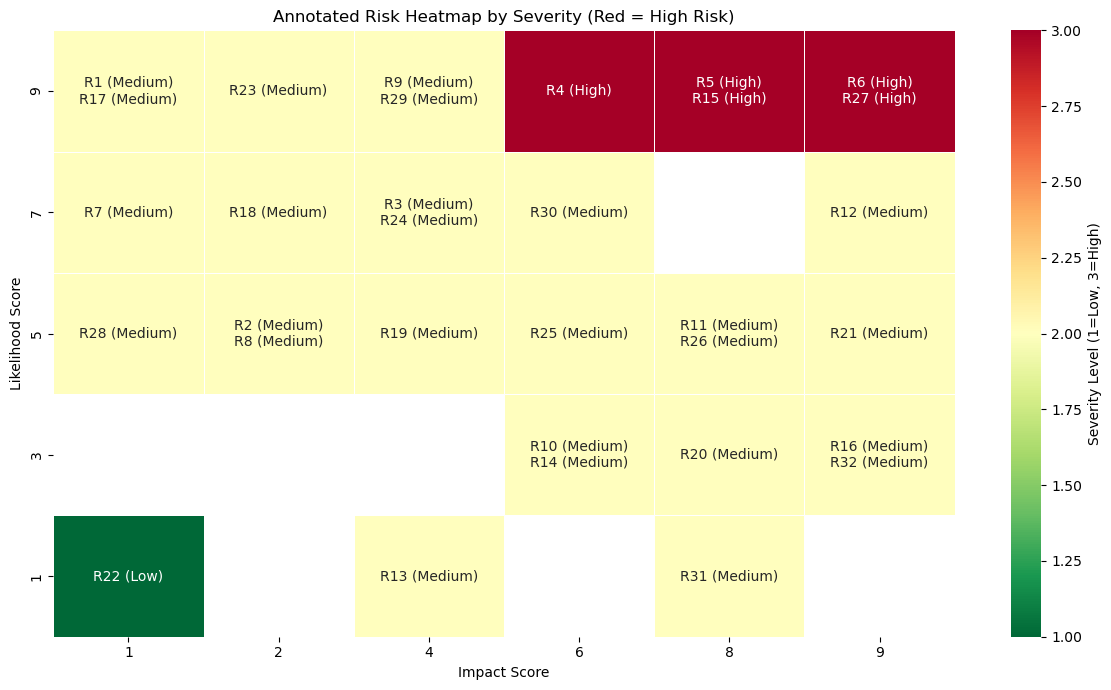

In [16]:
# Copy the original DataFrame
severity_map = df_risk_register.copy()

# Define severity classification logic
def classify_severity(row):
    if row['Likelihood Score'] >= 8 and row['Impact Score'] >= 5:
        return 'High'
    elif row['Likelihood Score'] >= 5 or row['Impact Score'] >= 3:
        return 'Medium'
    else:
        return 'Low'

# Apply classification and map severity to numeric scale
severity_map['Severity'] = severity_map.apply(classify_severity, axis=1)
severity_levels = {'Low': 1, 'Medium': 2, 'High': 3}
severity_map['Severity_Num'] = severity_map['Severity'].map(severity_levels)

# Create Risk ID label
severity_map['Label'] = 'R' + severity_map['Risk #'].astype(str) + ' (' + severity_map['Severity'] + ')'

# Pivot table with most severe risk per cell
pivot_severity = severity_map.groupby(['Likelihood Score', 'Impact Score'])['Severity_Num'].max().unstack()
pivot_severity = pivot_severity.sort_index(ascending=False)
pivot_severity = pivot_severity[pivot_severity.columns.sort_values()]

# Annotation matrix (Risk IDs and severity)
label_matrix = severity_map.groupby(['Likelihood Score', 'Impact Score'])['Label'] \
                           .apply(lambda x: '\n'.join(x)).unstack(fill_value='')
label_matrix = label_matrix.sort_index(ascending=False)
label_matrix = label_matrix[label_matrix.columns.sort_values()]

# Plot severity heatmap with annotations
plt.figure(figsize=(12, 7))
sns.heatmap(pivot_severity, annot=label_matrix, fmt='', cmap='RdYlGn_r', linewidths=0.5,
            cbar_kws={'label': 'Severity Level (1=Low, 3=High)'})
plt.title("Annotated Risk Heatmap by Severity (Red = High Risk)")
plt.xlabel("Impact Score")
plt.ylabel("Likelihood Score")
plt.tight_layout()
plt.show()


C:\Users\abina\miniforge3\envs\dsci575\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


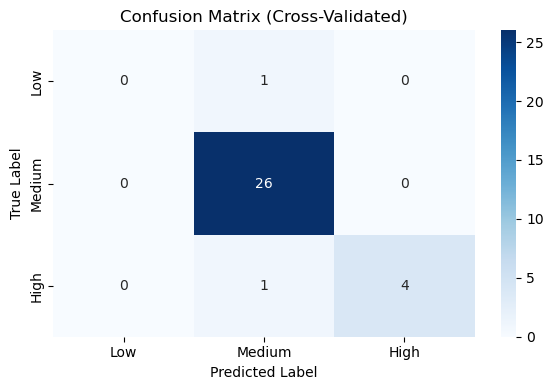

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# Reuse model and labels
y_pred_cv = cross_val_predict(model, X, y, cv=5)
conf_matrix = confusion_matrix(y, y_pred_cv, labels=['Low', 'Medium', 'High'])

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'], 
            yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix (Cross-Validated)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


### Interpretation
The matrix shows how well the machine learning model predicts the risk severity levels (Low, Medium, High) based on the likelihood and impact scores.

We're using a Random Forest classifier to predict one of three severity categories: Low, Medium and High

### Confusion Matrix Breakdown

26 out of 26 Medium risks were correctly predicted: Very strong performance here.

4 High risks were correctly predicted, but 1 was misclassified as Medium.

1 Low risk was also misclassified as Medium.

No predictions were made for "Low" .This may be due to having very few examples in that class.